# Import libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [4]:
original_data = pd.read_csv("./original_data.csv")
original_data.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0


In [5]:
original_data.shape

(1814, 51)

In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_id                 1814 non-null   object 
 1   can_nam                1814 non-null   object 
 2   can_off                1814 non-null   object 
 3   can_off_sta            1814 non-null   object 
 4   can_off_dis            1812 non-null   float64
 5   can_par_aff            1813 non-null   object 
 6   can_inc_cha_ope_sea    1812 non-null   object 
 7   can_str1               1789 non-null   object 
 8   can_str2               122 non-null    object 
 9   can_cit                1813 non-null   object 
 10  can_sta                1806 non-null   object 
 11  can_zip                1789 non-null   float64
 12  ind_ite_con            1570 non-null   object 
 13  ind_uni_con            1538 non-null   object 
 14  ind_con                1616 non-null   object 
 15  par_

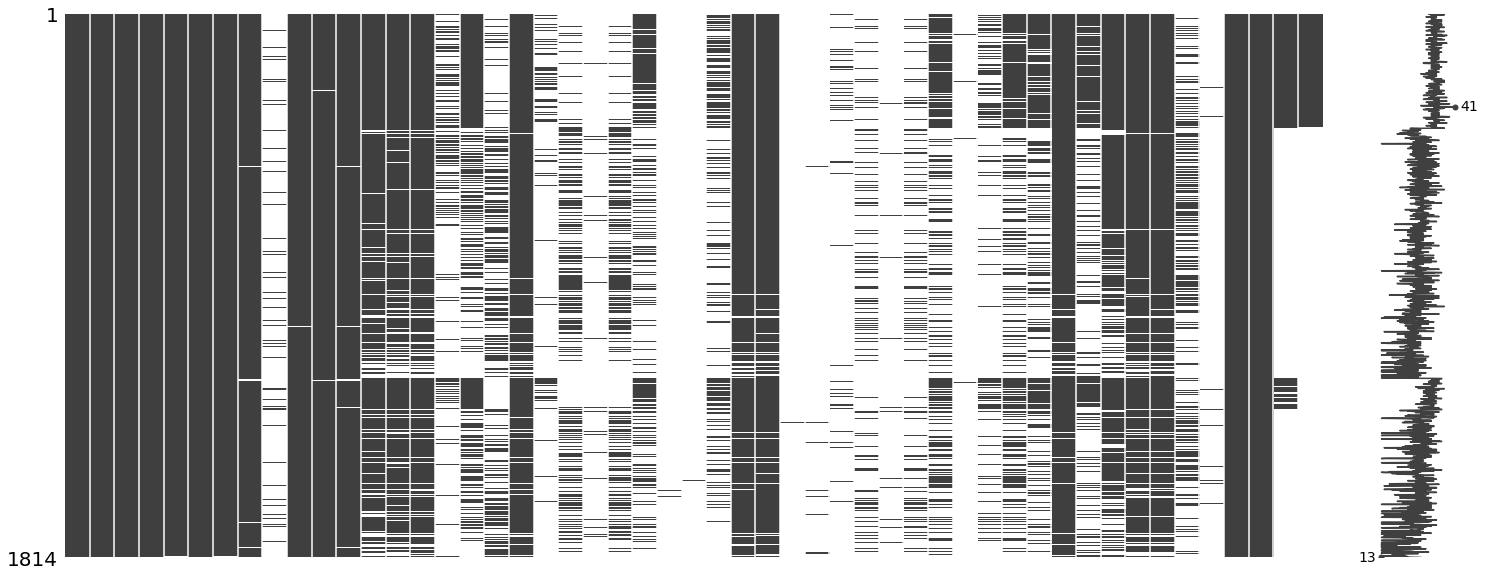

In [7]:
msn.matrix(original_data)

In [8]:
#process date values

original_data['cov_sta_dat'] = pd.to_datetime(original_data['cov_sta_dat'])
original_data['cov_end_dat'] = pd.to_datetime(original_data['cov_end_dat'])

original_data['campaign_duration'] = (original_data['cov_end_dat'] - original_data['cov_sta_dat']).dt.days

**Observation** 
1. data contains messy features 
2. create a function to deal with features with high percentage of missing data

In [9]:
#create a function to check all columns with missing data greater than 90% and drop them

def process_missing_data(data, threshold, inplace_value):
    #create a list to hold columns with missing value above threshold
    drop_cols = []
    
    #create a variable to store all columns in the dataframe
    all_cols = data.columns
    
    #calculate all columns with missing values percentage greater than the threshold
    missing_percentage = (data[all_cols].isna().sum()/len(data))*100
    
    #create a dataframe to store all candidate columns and their percentage
    missing_df = pd.DataFrame({"cols":all_cols, "percentage":missing_percentage})
    
    #check for threshold condition
    missing_filtered = missing_df[missing_df['percentage'] >= threshold] 
    drop_cols.append(missing_filtered["cols"].tolist())
    
    #drop candidate columns
    drop_cols = drop_cols[0]
    data.drop(columns=drop_cols, inplace= inplace_value)
    
    return data.shape


In [10]:
#call function on data
process_missing_data(data=original_data, threshold=90, inplace_value=True)

(1814, 42)

**Research information**
* The key finance feature is the net_ope_exp feature as it contains the total money spent during campaign leading up to the 2016 election

In [11]:
#first, convert the net_con column to a float data type and modify data inplace
def converter(data, data_col):
    value = data[data_col].str.replace('$','').str.replace(',','').str.replace('(','-').str.replace(')','').astype('float32')
    data[data_col] = value
    return data.head()

#call the function on the net_con feature
converter(data=original_data, data_col="net_ope_exp")

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_cit,can_sta,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,cov_sta_dat,cov_end_dat,winner,votes,campaign_duration
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,AUGUSTA,GA,...,"$60,109.57","$175,613.35","$1,074,949.50",9.071562e+05,"$1,125,000.00",2015-01-01,2016-10-19,Y,158708.0,657
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,PHILADELPHIA,PA,...,NaN,"$105,687.23","$1,406,719.06",1.298832e+06,NaN,2015-11-02,2016-10-19,Y,310770.0,352
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,JACKSONVILLE,FL,...,NaN,"$35,645.09","$650,855.38",6.562103e+05,"$60,000.00",2016-04-01,2016-10-19,Y,286018.0,201
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,WHITEFISH,MT,...,"$83,815.78","$399,122.61","$4,938,943.74",5.055942e+06,NaN,2015-01-01,2016-10-19,Y,280476.0,657
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",OAKLAND,CA,...,"$83,690.60","$181,338.23","$1,197,676.61",9.494890e+05,"$4,401.75",2015-01-01,2016-10-19,Y,277390.0,657


**replace all the nan columns in the winner with N as they represent the losers**

In [12]:
original_data['winner'] = original_data['winner'].fillna('N')

# **Explore the data**

**First, we see what offices the candidates are campaigning for**

In [13]:
original_data['can_off'].value_counts(normalize=True, sort=True) * 100

H    78.776185
S    12.513782
P     8.710033
Name: can_off, dtype: float64

**Basically, there are three offices namely**
* H : house of represenatative
* S : senator
* P : presidency

**create three dataframes based on the candidate office and export for analysis**

In [14]:
H_df = original_data.loc[original_data['can_off'] == "H"] 
S_df = original_data.loc[original_data['can_off'] == "S"]
P_df = original_data.loc[original_data['can_off'] == "P"]

In [15]:
#export data set
H_df.to_csv("../data_secgrp/H_df.csv", index=False)
S_df.to_csv("../data_secgrp/S_df.csv", index=False)
P_df.to_csv("../data_secgrp/P_df.csv", index=False)